### CP#34 - IncomeInsight: Predicting Earning Potential from Demographic & Employment Data

### Feature Engineering Notebook
This notebook is used to explore, experiment with, and finalize preprocessing logic before moving it into the reusable `preprocess.py` module.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler,
    MinMaxScaler, 
    OrdinalEncoder
)

In [26]:
df = pd.read_csv('../data/adult_cleaned.csv')

In [27]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'race', 'sex', 'capital.gain',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

### New features

Binary flags

In [28]:
# Binary Feature Prototypes
df['sex_binary'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income_binary'] = df['income'].map({'>50K': 1, '<=50K': 0})
df['has_capital_gain'] = (df['capital.gain'] > 0).astype(int)
df['married_together'] = df['marital.status'].map(
    lambda x: 1 if x in ['Married-AF-spouse', 'Married-civ-spouse'] else 0)

df = df.drop(columns = ['sex', 'income', 'marital.status'])

Bin education

Text(0.5, 1.0, 'Binned Education Levels')

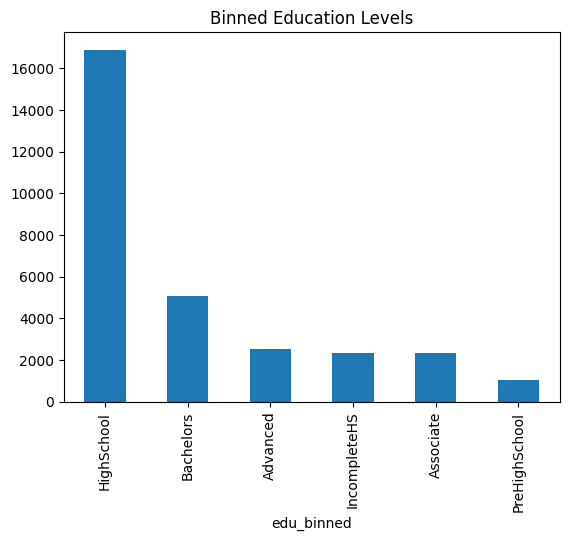

In [29]:
# Binning education.num
def bin_education(edu_num):
    if edu_num <= 4:
        return 'PreHighSchool'
    elif edu_num <= 7:
        return 'IncompleteHS'
    elif edu_num <= 10:
        return 'HighSchool'
    elif edu_num <= 12:
        return 'Associate'
    elif edu_num == 13:
        return 'Bachelors'
    else:
        return 'Advanced'

df['edu_binned'] = df['education.num'].apply(bin_education)
df['edu_binned'].value_counts().plot(kind='bar')
plt.title('Binned Education Levels')

Interaction terms

In [30]:
# Numerical interaction terms
df['hours_x_edu'] = df['hours.per.week'] * df['education.num']
df['hours_x_age'] = df['hours.per.week'] * df['age']
df['capital_x_edu'] = df['capital.gain'] * df['education.num']

df = df.drop(columns = ['education.num'])

###Task 2:  Preprocessing with encoding and scaling

One hot encoding

In [31]:
# exclude income, sex, education, marital.status, and relationship from one-hot encoding
remaining_categorical_features = ['race', 'workclass', 'occupation', 'native.country']

encoded = pd.get_dummies(df[remaining_categorical_features], drop_first=True)

# Drop the original categorical columns
df_dropped = df.drop(columns=remaining_categorical_features)

# Append the encoded columns
df_encoded = pd.concat([df_dropped, encoded], axis=1)

In [32]:
# Ordinal Encoding for education levels
df_encoded['edu_binned_ord'] = OrdinalEncoder(
    categories=[['PreHighSchool', 'IncompleteHS', 'HighSchool', 'Associate', 'Bachelors', 'Advanced']]
).fit_transform(df_encoded[['edu_binned']])

df_encoded = df_encoded.drop(columns=['education', 'edu_binned'])

Scaling

In [33]:
# Scaling normal numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_encoded[['age_scaled', 'hours_scaled']] = scaler.fit_transform(df_encoded[['age', 'hours.per.week']])

# Scaling skewed numerical features
minmax = MinMaxScaler()
df_encoded['cap_gain_scaled'] = minmax.fit_transform(df_encoded[['capital.gain']])

df_scaled = df_encoded.drop(columns=['age', 'hours.per.week', 'capital.gain'])

Output

## Final Preprocessing Plan
- Binary columns: sex, income, capital gain, married_together
- Binning education.num → ordinal encoding
- One-hot encode: race, workclass, native.country, etc.
- Interaction terms:
    - age × hours, hours × edu, capital_gain × edu
- Standard scale: age, hours
- MinMax scale: capital_gain

In [37]:
df_scaled.shape

(30162, 75)

In [39]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 75 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 30162 non-null  int64  
 1   sex_binary                                 30162 non-null  int64  
 2   income_binary                              30162 non-null  int64  
 3   has_capital_gain                           30162 non-null  int64  
 4   married_together                           30162 non-null  int64  
 5   hours_x_edu                                30162 non-null  int64  
 6   hours_x_age                                30162 non-null  int64  
 7   capital_x_edu                              30162 non-null  int64  
 8   race_Asian-Pac-Islander                    30162 non-null  bool   
 9   race_Black                                 30162 non-null  bool   
 10  race_Other            